In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.3.0


In [6]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
tokenizer = info.features['text'].encoder

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


In [16]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')   
# ])
# model.summary()

# Double layers of Bidirectional LSTM

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Convolutional Network 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 201s 514ms/step - loss: 0.4498 - accuracy: 0.7686 - val_loss: 0.2794 - val_accuracy: 0.8834
Epoch 2/10
391/391 [==============================] - 205s 524ms/step - loss: 0.1887 - accuracy: 0.9292 - val_loss: 0.2583 - val_accuracy: 0.8934
Epoch 3/10
391/391 [==============================] - 202s 517ms/step - loss: 0.0623 - accuracy: 0.9834 - val_loss: 0.3040 - val_accuracy: 0.8926
Epoch 4/10
391/391 [==============================] - 201s 514ms/step - loss: 0.0110 - accuracy: 0.9991 - val_loss: 0.3454 - val_accuracy: 0.8953
Epoch 5/10
391/391 [==============================] - 201s 515ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3766 - val_accuracy: 0.8949
Epoch 6/10
391/391 [==============================] - 202s 516ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3969 - val_accuracy: 0.8946
Epoch 7/10
391/391 [==============================] - 201s 515ms/step - loss: 7.6163e-04 - accuracy: 1.0000 - val_loss: 0.41

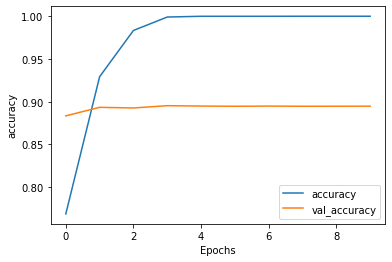

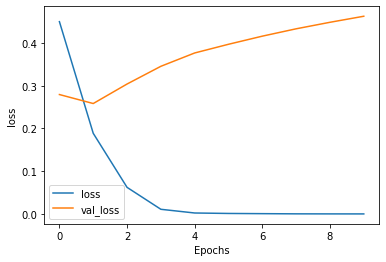

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')